# <font color='blue'>Balanceamento de classes</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


In [2]:
# Carregando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Carregando o dataset Iris que já vem com a biblioteca Seaborn
dfIris = sns.load_dataset("iris")
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Coletando os dados 
# Atenção para o dataset que foi carregado. A variável idade não tem valores nulos nem outliers neste conjunto de dados.
dfTitanic = pd.read_csv('Dados/Titanic/titanicTransformado.csv')
dfTitanic.head()

,Unnamed: 0,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Idade
0,0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,4,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [5]:
# Excluindo colunas do DataFrame
dfTitanic = dfTitanic.drop(["Unnamed: 0","Name", "Ticket"], axis=1)
dfTitanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Idade
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [6]:
# Convertendo variáveis categóricas em valores numéricos (variáveis dummy)
dfTitanic = pd.get_dummies(dfTitanic)
dfTitanic.head()

,Survived,Pclass,SibSp,Parch,Fare,Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,False,True,False,False,True
1,1,1,1,0,71.2833,38.0,True,False,True,False,False
2,1,3,0,0,7.9250,26.0,True,False,False,False,True
3,1,1,1,0,53.1000,35.0,True,False,False,False,True
4,0,3,0,0,8.0500,35.0,False,True,False,False,True


In [7]:
# Convertendo variáveis categóricas em valores numéricos (variáveis dummies)
encoder = OneHotEncoder()
X = dfTitanic[["Pclass"]]
dadosCodificados = encoder.fit_transform(X).toarray()
dadosCodificados

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [8]:
# Salvando as categorias criadas pelo Encoder
colunas = []
for i in encoder.get_feature_names_out():
    colunas.append(i)
colunas

['Pclass_1', 'Pclass_2', 'Pclass_3']

In [9]:
# Criando um DataFrame com as categorias codificadas
dfCodificados = pd.DataFrame(dadosCodificados, columns=colunas)
dfCodificados.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [10]:
# Inserindo colunas no DataFrame
dfTitanic["Pclass_1"] = dfCodificados["Pclass_1"]
dfTitanic["Pclass_2"] = dfCodificados["Pclass_2"]
dfTitanic["Pclass_3"] = dfCodificados["Pclass_3"]
   
# Excluindo coluna
dfTitanic = dfTitanic.drop(["Pclass"], axis=1)   
dfTitanic.head()

,Survived,SibSp,Parch,Fare,Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,22.0,False,True,False,False,True,0.0,0.0,1.0
1,1,1,0,71.2833,38.0,True,False,True,False,False,1.0,0.0,0.0
2,1,0,0,7.9250,26.0,True,False,False,False,True,0.0,0.0,1.0
3,1,1,0,53.1000,35.0,True,False,False,False,True,1.0,0.0,0.0
4,0,0,0,8.0500,35.0,False,True,False,False,True,0.0,0.0,1.0


In [11]:
# Visualizando o DataFrame
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


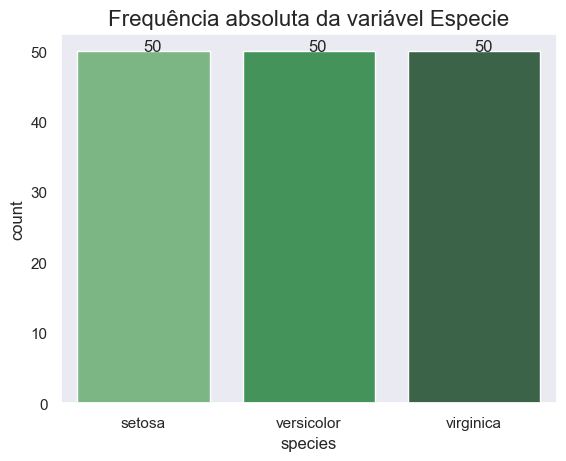

In [12]:
# Verificando a quantidade de espécies do dataset Iris
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=dfIris.species, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Especie", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [13]:
# Visualizando um DataFrame
dfTitanic.head()

,Survived,SibSp,Parch,Fare,Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,22.0,False,True,False,False,True,0.0,0.0,1.0
1,1,1,0,71.2833,38.0,True,False,True,False,False,1.0,0.0,0.0
2,1,0,0,7.9250,26.0,True,False,False,False,True,0.0,0.0,1.0
3,1,1,0,53.1000,35.0,True,False,False,False,True,1.0,0.0,0.0
4,0,0,0,8.0500,35.0,False,True,False,False,True,0.0,0.0,1.0


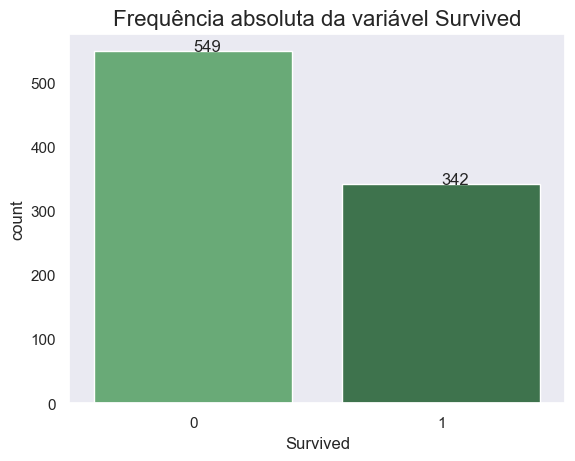

In [14]:
# Verificando a quantidade de sobreviventes e não sobreviventes do dataset Titanic
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=dfTitanic.Survived, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

### Balanceamento de classes utilizando o parâmetro stratify da função train_test_split

In [15]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfIris)
numeroVariaveisPreditoras = 4
X = dfIris[["sepal_length","sepal_width","petal_length","petal_width"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfIris['species'].values # y pode ser um vetor

In [17]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=10)

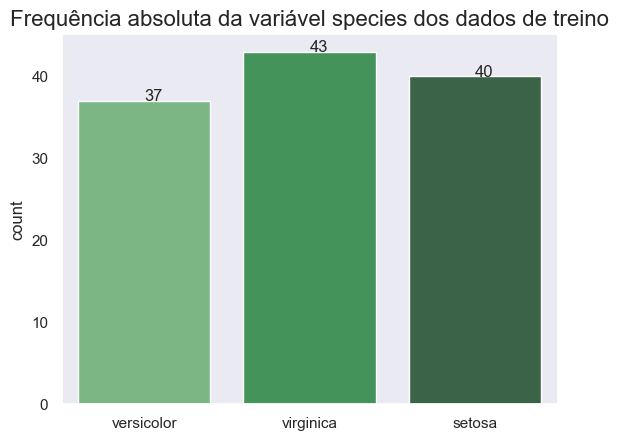

In [18]:
# Countplot da variável species desbalanceada
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável species dos dados de treino", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [19]:
# Divide os dados em treino e teste utilizando o parâmetro stratify
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=10, stratify=y)

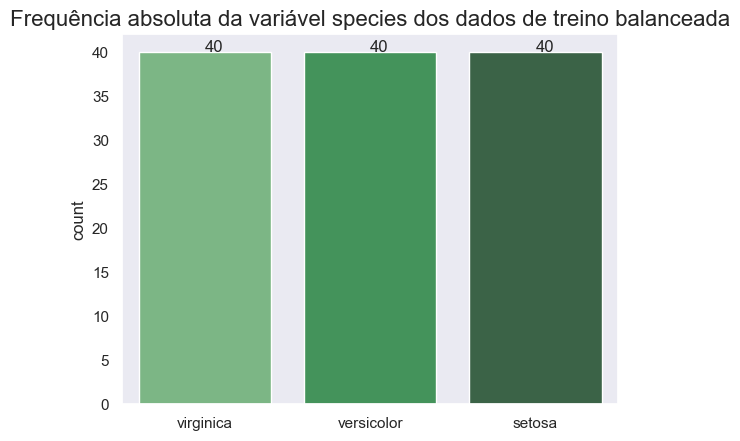

In [20]:
# Countplot da variável species BALANCEADA
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável species dos dados de treino balanceada", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [21]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfTitanic)
numeroVariaveisPreditoras = 11
X = dfTitanic[["SibSp","Parch","Idade", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfTitanic['Survived'].values # y pode ser um vetor

In [22]:
# Divide os dados em treino e teste utilizando o parâmetro stratify
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=23, stratify=y)

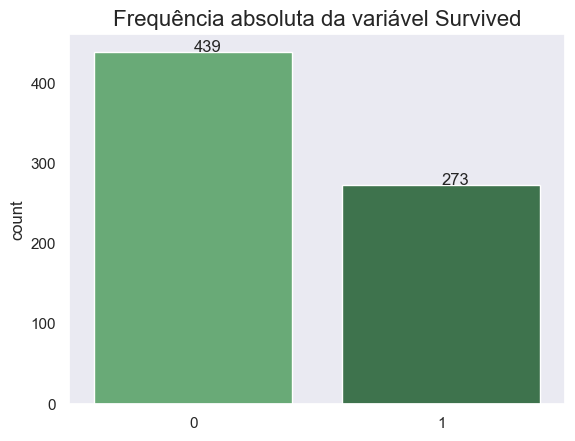

In [23]:
# Countplot da variável Survived
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

### Balanceamento de classes utilizando Synthetic Minority Oversampling Technique (SMOTE) 

**Oversampling** é uma técnica que cria novas observações da classe com menor quantidade. 

In [ ]:
# Instalando o pacote imbalanced-learn
# É necessário reiniciar o Jupyter Lab após a instalação
!pip install -U imbalanced-learn

In [24]:
# Carregando a classe SMOTE
from imblearn.over_sampling import SMOTE

In [25]:
# Criando o objeto do tipo SMOTE. O parâmetro k_neighbors indica quantos vizinhos serão considerados para fazer o oversampling.
overSampler = SMOTE(k_neighbors = 3, random_state=8)

In [26]:
# Aplicando o oversampling 
Xtreino, Ytreino = overSampler.fit_resample(Xtreino, Ytreino)

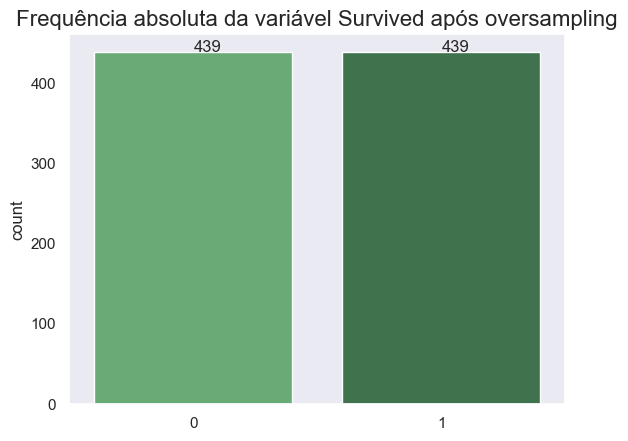

In [27]:
# Countplot da variável alvo no dataset de treino após o oversampling.
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived após oversampling", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

### Balanceamento de classes reduzindo a classe majoritária (undersampling)

In [28]:
# Divide os dados em treino 
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=23)

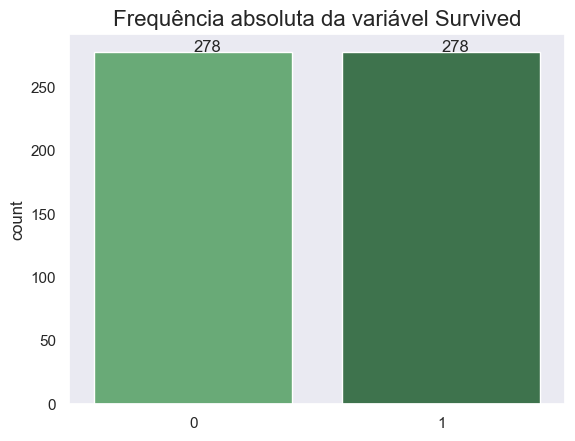

In [34]:
# Countplot da variável Survived
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [30]:
# Carregando a classe RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler 

# Criando o objeto do tipo RandomUnderSampler
underSampler = RandomUnderSampler(random_state=42)

# Fazendo o undersampling
Xtreino, Ytreino = underSampler.fit_resample(Xtreino, Ytreino)

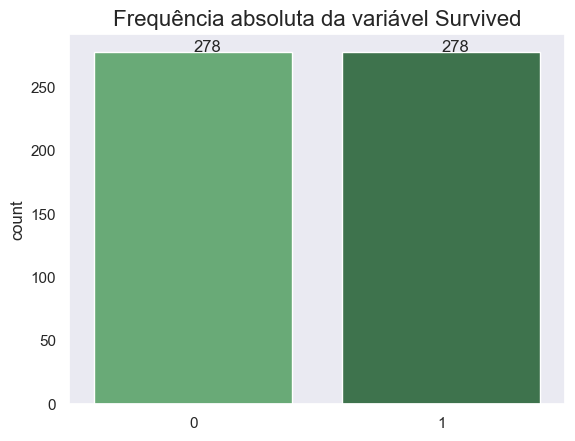

In [31]:
# Countplot da variável Survived
sns.set_theme(style="dark") # Define o tema utilizado.

ax = sns.countplot(x=Ytreino, palette = "Greens_d");
ax.set_title("Frequência absoluta da variável Survived", fontsize = 16)
for p in ax.patches: # Exibe os valores no gráfico
    _x = p.get_x() + p.get_width() - 0.4
    _y = p.get_y() + p.get_height()
    value = int(p.get_height())
    ax.text(_x, _y, value, ha="left")
plt.show()

In [32]:
# Gerando um arquivo CSV a partir de um Dataframe
dfTitanic.to_csv('Dados/Titanic/titanicDummies.csv')